In [1]:
# -*- coding: utf-8 -*-

#!/usr/bin/python
# -*- coding: utf-8 -*-

In [2]:
__author__ = 'pnovais'

## Project Titanic

**Pergunta:** 
Qual a probabilidade de uma pessoa morrer, dado que é do sexo masculino e que estava na 3a classe?

Dentre as diversas informações encontradas no dataset, podemos listar as seguintes: 
-  Nome
-  Sexo
-  Classe Social
-  Se morreu ou não
-  Idade

### Probabilidade Condicional

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

Em nosso caso, temos 3 eventos:

*  **A**: a pessoa morrer

*  **B**: ser homem

*  **C**: estar na 3a classe

Assim, queremos então $P(A| B \cap C)  $, que pode ser obtido através de

$P(A| B \cap C) =\frac{P(A \cap (B \cap C))}{P(B \cap C)}$


Ainda, sabendo que 

$P(A \cap (B \cap C)) = P(A \cap B \cap C) = P(A)P(B|A)P(C|B \cap A)$

Concluimos que a probabilidade de interesse é obtida através de

$P(A| B \cap C) = \frac{P(A)P(B|A)P(C|B \cap A)}{P(B \cap C)}$


***
# Analisando o dataset

***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

%matplotlib inline
ini=time.time()

In [4]:
plt.style.use('mystyle-paty.mplstyle')

In [5]:
#Abrindo o dataset
link  = 'https://raw.githubusercontent.com/rebeccabilbro/titanic/master/data/train.csv'
df0 = pd.read_csv(link)

In [6]:
#Overview dos dados
df0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Verificando Missing Data
df0.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**>** Observando os dados, pode-se notar que existem *missing data*  nas colunas "Age", "Cabin" e "Embarked". Ainda,  as colunas "PassengerID", "Name", "SibSp", "Parch", "Ticket" e "Fare" não são de interesse nesse momento, criaremos um novo dataframe apenas com as colunas "Survived", "Pclass" e "Sex".

In [8]:
df = df0.loc[:,('Survived','Pclass','Sex')]
df.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


**>** Importante notar as variáveis do novo dataframe são do tipo categórica, sendo "Pclass" ordinal e as demais nominais. Ainda, a variável "Survived" assume o valor 1 caso a pessoa tenha sobrevivido e valor 0 caso a pessoa tenha morrido.

### Alguns plots interessantes

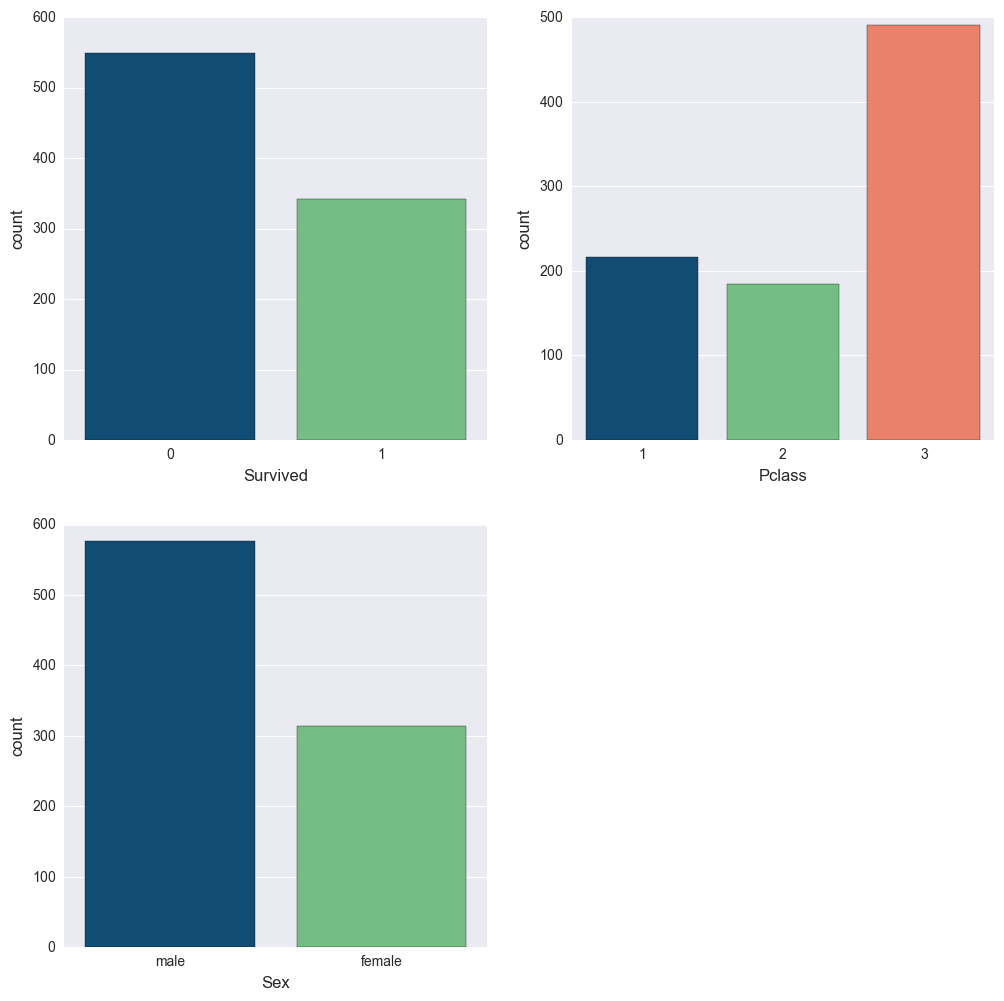

In [9]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x='Survived',data=df)

ax2 = plt.subplot(222)
ax2 = sns.countplot(x='Pclass',data=df)

ax3 = plt.subplot(223)
ax3 = sns.countplot(x='Sex',data=df)


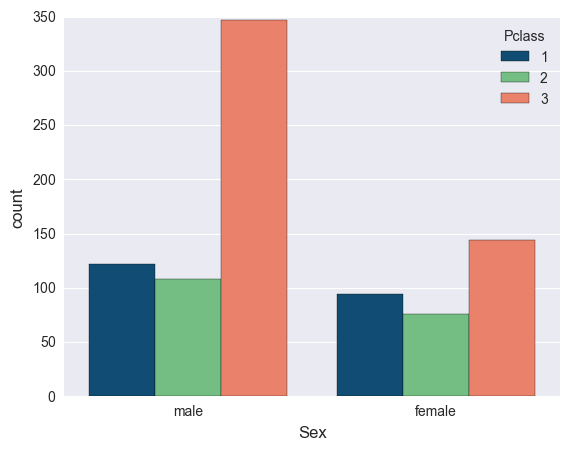

In [10]:
sns.countplot(x='Sex', data=df , hue='Pclass')

**>** Observando os countplots acima, nota-se claramente que

- ~ 2/3 dos tripulantes morreram
- ~ 1/2 da tripulação era composta por classe 3
- ~ 2/3 eram homens
-  A quantidade de homens na classe 3 é maior do que a soma dos homens nas classes 1 e 2
-  Com relação às mulheres, há mais mulheres na classe 3 do que nas demais, mas a proporção de mulheres entre as classes é mais balanceada do que no caso dos homens

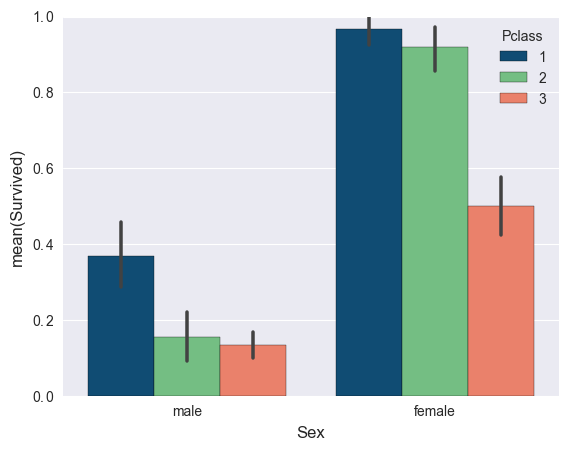

In [11]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)

**>** Já analisando as três informações conjuntamente, temos resultados bastante interessantes.

- A maior parte dos sobreviventes foram mulheres
    - a maioria das mulheres sobreviventes eram da classe 1 e 2
    - a quantidade de mulheres salvas da classe 1 é equiparável a quantiade de mulheres salvas da classe 2
    - com as sobreviventes da classe 3 correspondendo a ~ 1/5 de todas as mulheres salvas
- Dentre os homens, os pertencentes a classe 1 tiveram maior índice de sobreviventes
    - A proporção de homens salvos nas classes 2 e 3 são bastante similares

***
**>** *Retornando à questão inicial, sobre a probabilidade de uma pessoa morrer, dado que é do sexo masculino e que estava na 3a classe*

$P(A| B \cap C) = \frac{P(A)P(B|A)P(C|B \cap A)}{P(B \cap C)}$

Abaixo reproduzo o passo a passo de como foi calculado essa probabilidade:

In [12]:
# Pa = P(A) = probabilidade de ter morrido
# Ea_a = Espaço amostral 
# df_S = dataframe somente com os não sobreviventes

Ea_a = len(df)*1.
df_S = df.loc[df.Survived == 0]

Pa = (df_S.Survived.count())/Ea_a
Pa

0.61616161616161613

In [13]:
# Pba = P(B|A) = probabilidade de ser homem, dentre os que morreram
# Ea_ba = Espaço amostral
# df_H = somente os não sobreviventes homens

Ea_ba = len(df_S)*1.
df_H = df_S.loc[df_S.Sex == 'male']

Pba = (df_H.Sex.count())/Ea_ba
Pba

0.85245901639344257

In [14]:
# Pcba = P(C|B inter A) = probabilidade de ser classe 3, dentre os homens que morreram
# Ea_cba = Espaço amostral
# df_c = somente os não sobreviventes homens da classe 3

Ea_cba = len(df_H)*1.
df_c = df_H.loc[df_S.Pclass == 3]

Pcba = (df_c.Pclass.count())/Ea_cba
Pcba

0.64102564102564108

In [15]:
# Pbc = P(B inter c) = probabilidade de ser homem E classe 3
# Ea_bc = Ea_a = Espaço amostral
# df_HC = somente homens da classe 3

Ea_bc = Ea_a
df_HC = df.loc[(df.Sex == 'male') & (df.Pclass == 3)]

Pbc = len(df_HC)/Ea_bc
Pbc

0.3894500561167228

In [16]:
P = (Pa * Pba * Pcba)/Pbc
print('%3.4f' %P)

0.8646


**>** Assim, a probabilidade de uma pessoa morrer, dado que é do sexo masculino E estava na 3a classe é **P = 0.8646**.

### Outras Análises Possíveis

As análises acima são bastante simples, mas já nos dá informações interessantes sobre os acontecimentos referentes aos tripulantes do Titanic. No presente caso, utilizamos apenas 3 informações (Pclass, Sex, Survived), mas nada nos impede de aprofundarmos nas informações e tentarmos entender, por exemplo,
-  A correlação da idade com a sobrevivência
    - Podemos inclusive extratificar em sexo
-  A correlação entre a sobrevivência e a quantidade de siblings/parents
-  A influência do valor da taxa (Fare)
-  Extratificar pela região de embarque

Claramente, há um vasto campo de análises possíveis de serem exploradas. Ainda, o *approach* utilizado acima considerou apenas uma análise frequentista, sendo que poderíamos analisar as probabilidades utilizando alguns *priores* como, por exemplo, a questão de haver preferência por salvar mulheres e crianças.

In [17]:
fim = time.time()
time_proc = fim - ini
print('')
#print(bcolors.FAIL +'-'*79+ bcolors.ENDC)
print('-------------------')
print('tempo de processamento: %fmin' %(time_proc/60))
print('-------------------')
today = datetime.datetime.now()
print('Hoje é %s/%s/%s, às %s:%s' %(today.day,today.month, today.year, today.hour, today.minute))


-------------------
tempo de processamento: 0.073650min
-------------------
Hoje é 6/5/2018, às 22:57
